#### THIS IS MOST IMPORTANT THING WHICH WILL BE HELPFUL TO CONVERT images folder to numeric dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)  
data_dir


WindowsPath('datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob('**/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('*/roses/*'))  
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

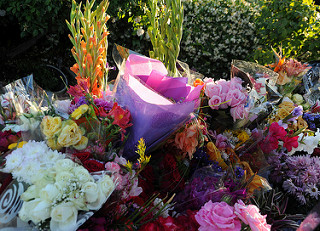

In [7]:
PIL.Image.open(str(roses[3]))

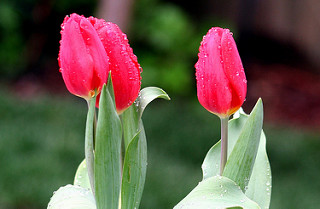

In [8]:
tulips = list(data_dir.glob('*/tulips/*'))  
tulips[:5]
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) # it converts image to numpy array 
img
# which is 3D 

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [14]:
img.shape #(240, 179, 3) 3 ---> Colors RGB 240, 179----> image size

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape # will fix image size to 180 ,180 needed to train the model

(180, 180, 3)

In [16]:
x=[]
y=[]

for Flowers_name , images in flowers_images_dict.items():
    print(Flowers_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [17]:
x=[]
y=[]

for Flowers_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[Flowers_name])

In [18]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [19]:
y[:5] #---> 0 --> roses 

[0, 0, 0, 0, 0]

In [20]:
x = np.array(x)
y = np.array(y)
x

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        